In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crop.csv")

In [3]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [4]:
# Display column names and data types for crop.csv
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None


In [5]:
# Display descriptive statistics for numerical columns in crop.csv
display(df.describe())


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [6]:
# Check for missing values in crop.csv
display(df.isnull().sum())

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"Number of duplicate rows: {duplicate_rows}")
    print("Would you like to remove them?")
else:
    print("No duplicate rows found.")

No duplicate rows found.


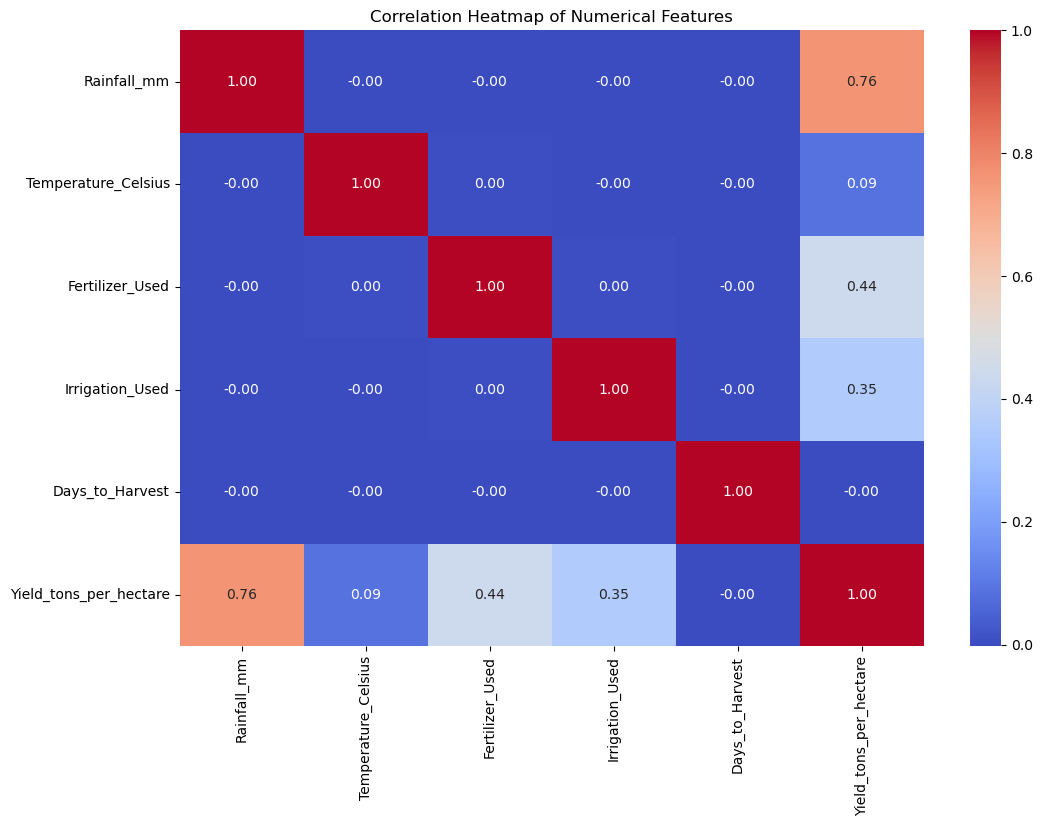

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

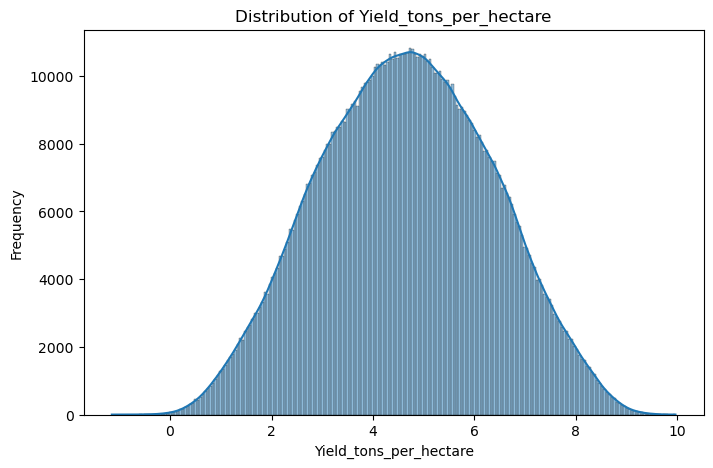

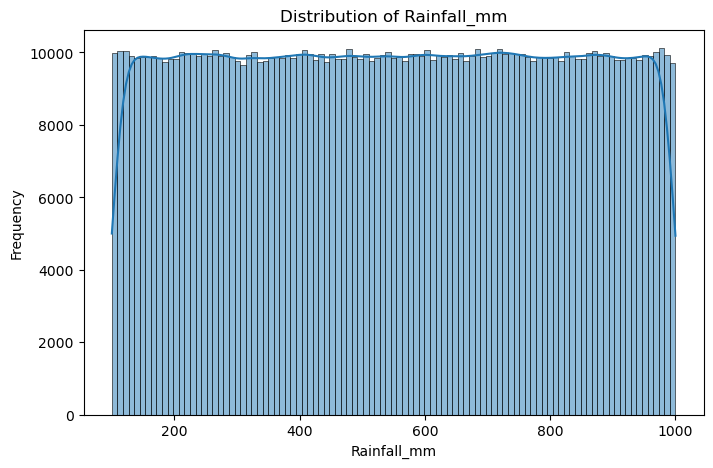

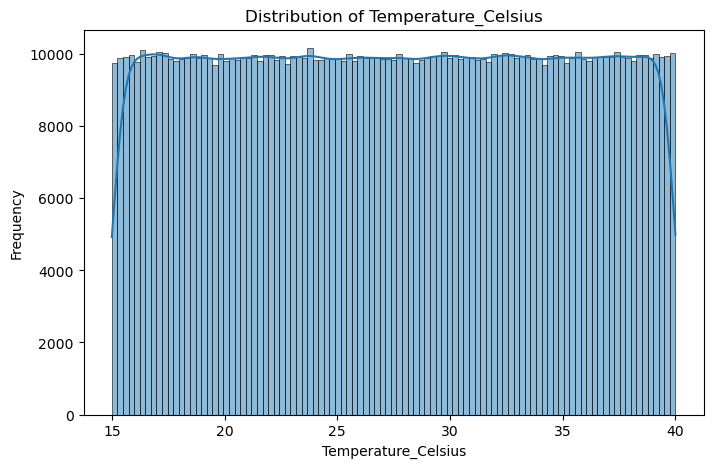

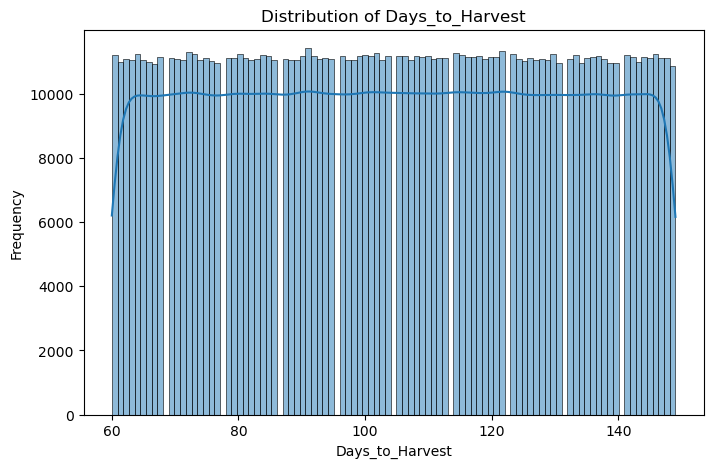

In [14]:
# Distribution Plots for key numerical features
numerical_features = ['Yield_tons_per_hectare', 'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

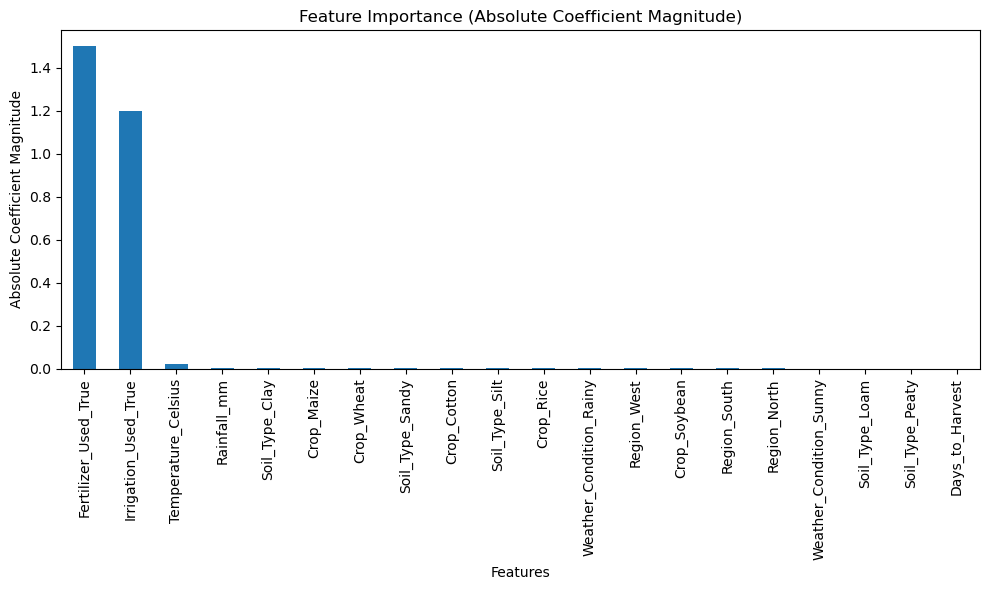

In [15]:
# Feature Importance Plot (for Linear Regression, we can look at coefficients)
# For more complex models, you would use model.feature_importances_ or similar
coefficients = pd.Series(model.coef_, index=X_train.columns)
sorted_coefficients = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='bar')
plt.title('Feature Importance (Absolute Coefficient Magnitude)')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Magnitude')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Task
Build a machine learning model to predict crop yield using the "crop.csv" dataset. Clean the data, train and evaluate the model, and suggest ways to improve its performance.

## Prepare data for modeling

### Subtask:
Select features and target variable, handle categorical variables, and split the data into training and testing sets.


**Reasoning**:
Define features (X) and target (y), identify categorical columns, apply one-hot encoding, and split the data into training and testing sets.



In [8]:
from sklearn.model_selection import train_test_split

# 1. Define the feature set X by dropping the 'Yield_tons_per_hectare' column from the DataFrame df.
X = df.drop('Yield_tons_per_hectare', axis=1)

# 2. Define the target variable y as the 'Yield_tons_per_hectare' column from the DataFrame df.
y = df['Yield_tons_per_hectare']

# 3. Identify the categorical columns in the feature set X.
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

# 4. Apply one-hot encoding to the categorical columns in X.
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# 5. Split the encoded feature set X and the target variable y into training and testing sets using an 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800000, 20)
Shape of X_test: (200000, 20)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


## Choose and train a model

### Subtask:
Select an appropriate model based on the problem (prediction) and data type, and train it on the training data.


**Reasoning**:
Import the LinearRegression model, instantiate it, and train it using the training data.



In [9]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model.
model = LinearRegression()

# Train the model using the X_train and y_train datasets.
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Assess the performance of the trained model using appropriate metrics on the testing data.


**Reasoning**:
Import necessary metrics, make predictions on the test set, and calculate and print the MSE and R-squared scores to evaluate the model performance.



In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 0.25077666857197467
R-squared (R2) Score: 0.9130137709140372


In [11]:
new_data = {
    'Region': ['North'],
    'Soil_Type': ['Sandy'],
    'Crop': ['Wheat'],
    'Rainfall_mm': [600.5],
    'Temperature_Celsius': [25.0],
    'Fertilizer_Used': [True],
    'Irrigation_Used': [False],
    'Weather_Condition': ['Sunny'],
    'Days_to_Harvest': [110]
}

In [12]:
# Convert new_data to a DataFrame
new_data_df = pd.DataFrame(new_data)

# Identify categorical columns in the new data that need encoding
new_data_categorical_cols = new_data_df.select_dtypes(include=['object', 'bool']).columns

# Apply one-hot encoding to the new data
new_data_encoded = pd.get_dummies(new_data_df, columns=new_data_categorical_cols, drop_first=True)

# Ensure the columns in the new data match the columns in the training data (X_train)
# Add missing columns with default value 0
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for c in missing_cols:
    new_data_encoded[c] = 0

# Ensure the order of columns is the same as in the training data
new_data_encoded = new_data_encoded[X_train.columns]

# Make prediction using the trained model
predicted_yield = model.predict(new_data_encoded)

# Print the predicted yield
print(f"Predicted Crop Yield: {predicted_yield[0]:.2f} tons per hectare")

Predicted Crop Yield: 3.50 tons per hectare
